<a href="https://colab.research.google.com/github/mccarthyajb/HL-NTAC/blob/main/2_Violin_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Mon Jun  6 23:18:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# SDAV Extra - Violin Plots

This notebook will demonstrate the use of Violin Plots. This visualisation technique, similar to a box plot, is well suited for comparing multiple distributions, and show a curved distribution plot for each feature under consideration. Below shows a simple violin plot example using Seaborn.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).
Drive Mounted


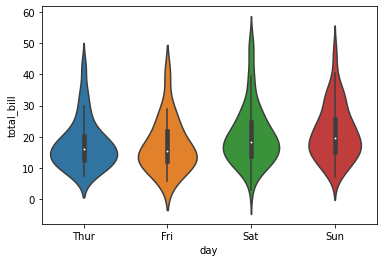

In [ ]:
#!pip install seaborn
!pip install lime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('./mount')
print("Drive Mounted")

tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

## Case Study: Comparing Benign and DDoS behaviours in network traffic analysis using CICIDS2017

Let's consider an example where we want to look at benign and malicious network traffic. We will use to CICIDS2017 dataset for this. This dataset captures in the region of 80 numerical features that characterise network activity. Each data instance has been labelled as either benign or as an attack type (we focus on DDoS here, however other attacks are present in the full dataset). What data attributes set these two classes apart? We can use violin plots to judge this visually over the entire dataset.

### Load in dataset and clean it up

First we will load in the data set, and we will remove all Not-a-Number and Infinity values that may be present. We will also remove columns that contain only zeros (i.e., no separating features).

In [ ]:
# Load in the dataset
# df2 = pd.read_csv(''My Drive/Colab Notebooks/CICIDS2017/resampledforbalance.csv'')
df2 = pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/resampledforbalance.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(df2)



        Unnamed: 0   Fwd Packet Length Min   Fwd Packet Length Mean  \
0                0                0.591398                 0.231448   
1                1                0.020215                 0.007911   
2                2                0.000000                 0.007171   
3                3                0.002581                 0.001010   
4                4                0.020215                 0.007911   
...            ...                     ...                      ...   
225740      225740                     NaN                      NaN   
225741      225741                     NaN                      NaN   
225742      225742                     NaN                      NaN   
225743      225743                     NaN                      NaN   
225744      225744                     NaN                      NaN   

         Fwd Packet Length Std  Bwd Packet Length Max   Bwd Packet Length Min  \
0                     0.000000               0.000307             

In [ ]:
# Output the classes
outcome = df2[' Label'].unique()
print(outcome)

Y_attack = df2[' Label']
print(Y_attack)

['BENIGN' 'Bot' 'DDoS' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest'
 'DoS slowloris' 'FTP-Patator' 'Heartbleed' 'Infiltration' 'PortScan'
 'SSH-Patator' 'Web Attack � Brute Force' 'Web Attack � Sql Injection'
 'Web Attack � XSS' nan]
0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
225740       NaN
225741       NaN
225742       NaN
225743       NaN
225744       NaN
Name:  Label, Length: 225745, dtype: object


In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
# X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
# Split data based on identified classes
# df2[' Label'] = df[' Label']
benign = df2[df2[' Label'] == outcome[0]]
ddos = df2[df2[' Label'] == outcome[1]]
portscan = df2[df2[' Label'] == outcome[2]]
bot = df2[df2[' Label'] == outcome[3]]
infiltration = df2[df2[' Label'] == outcome[4]]
webattackbruteforce = df2[df2[' Label'] == outcome[5]]
webattackxxs = df2[df2[' Label'] == outcome[6]]
webattacksqlinjection = df2[df2[' Label'] == outcome[7]]
ftppatator = df2[df2[' Label'] == outcome[8]]
sshpatator = df2[df2[' Label'] == outcome[9]]
dosslowloris = df2[df2[' Label'] == outcome[10]]
dosslowhttptest = df2[df2[' Label'] == outcome[11]]
doshulk = df2[df2[' Label'] == outcome[12]]
dosgoldeneye = df2[df2[' Label'] == outcome[13]]
heartbleed = df2[df2[' Label'] == outcome[14]]

traffictypes = [benign, ddos, portscan ,bot, infiltration,
webattackbruteforce, webattackxxs, webattacksqlinjection,
ftppatator, sshpatator, dosslowloris, dosslowhttptest, doshulk , dosgoldeneye, heartbleed ]

In [ ]:
benign

,Unnamed: 0,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,...,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Label
0,0,0.591398,0.231448,0.000000,0.000307,0.000000,0.000862,0.000299,0.111921,0.333334,...,0.000021,4.576987e-08,0.003510,0.000015,0.000000,1.0,0.000000,0.0,0.000000,BENIGN
1,1,0.020215,0.007911,0.000000,0.008807,0.059392,0.029653,0.000000,0.111922,0.333336,...,0.000007,5.248278e-07,0.000000,0.000000,0.000014,1.0,0.000000,0.0,0.000000,BENIGN
2,2,0.000000,0.007171,0.013368,0.083615,0.000000,0.156986,0.101805,0.111921,0.333333,...,0.000017,6.946341e-06,0.125015,0.014450,0.000005,1.0,0.000000,0.0,0.000000,BENIGN
3,3,0.002581,0.001010,0.000000,0.000000,0.000000,0.000000,0.000000,0.112028,0.340278,...,0.000000,0.000000e+00,0.000015,0.000000,0.000005,1.0,0.000000,0.0,0.000000,BENIGN
4,4,0.020215,0.007911,0.000000,0.007168,0.048343,0.024136,0.000000,0.111922,0.333336,...,0.000003,2.135927e-07,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,BENIGN
5,5,0.009892,0.003871,0.000000,0.001178,0.007942,0.003965,0.000000,0.112147,0.337143,...,0.000007,7.018047e-08,0.000000,0.000000,0.000005,1.0,0.000000,0.0,0.000000,BENIGN
6,6,0.015914,0.006228,0.000000,0.005172,0.034876,0.017412,0.000000,0.112597,0.337143,...,0.000007,3.081838e-07,0.000000,0.000000,0.000005,1.0,0.000000,0.0,0.000000,BENIGN
7,7,0.002581,0.001010,0.000000,0.000000,0.000000,0.000000,0.000000,0.113636,0.444444,...,0.000000,0.000000e+00,0.000015,0.000000,0.000005,1.0,0.000000,0.0,0.000000,BENIGN
8,8,0.016344,0.006396,0.000000,0.007680,0.051796,0.025860,0.000000,0.112558,0.335968,...,0.000007,4.576987e-07,0.000000,0.000000,0.000005,1.0,0.000000,0.0,0.000000,BENIGN
9,9,0.011613,0.004545,0.000000,0.001382,0.009323,0.004655,0.000000,0.111921,0.333333,...,0.000014,1.647715e-07,0.000000,0.000000,0.000014,1.0,0.020472,0.0,0.020472,BENIGN


### Visualise the output

We now have our data split into the classes, so we can use the violin plot for each of our classes independently, and compare the two figures.

In [ ]:
current_color = 0 

def violinplot(traffictype, trafficstring):
  global current_color
  
  colors = ['#1F77B4', '#AEC7E8', '#FFBB78', '#2CA02C', '#98DF8A', '#FF9896', '#9467BD', '#8C564B', '#C49C94', '#E377C2', '#7F7F7F', '#C7C7C7', '#BCBD22', '#17BECF', '#9EDAE5']
  # plot_violin = False
  plot_violin = True
  
  if(plot_violin):
    # traffictype=benign
    # trafficstring="benign"
    plt.figure(figsize=(30,5),dpi=300)
    ax = sns.violinplot(data=traffictype, color=colors[current_color])
    current_color = current_color + 1
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
    title = "Violin Plot to show " + str(trafficstring) + " feature distributions"
    ax.set_title(title)
    plt.savefig(('mount/My Drive/Colab Notebooks/Figures/' + trafficstring + '.png'))
  else:
    print("plot_violin = False - Skipping Plot")



 


In [ ]:
violinplot(benign, "benign")

In [ ]:
violinplot(ddos, "DDoS")

# traffictype=ddos
# trafficstring="DDoS"
# plt.figure(figsize=(30,13))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(trafficstring) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(portscan, "PortScan")
# traffictype=portscan
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(bot, "Botnet")
# traffictype=bot
# trafficstring="botnet"
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(trafficstring) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(infiltration, "infiltration")
# traffictype=infiltration
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(webattackbruteforce, "web attack brute force")
# traffictype=webattackbruteforce
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(webattackxxs,"web attack XXS")
# traffictype=webattackxxs
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

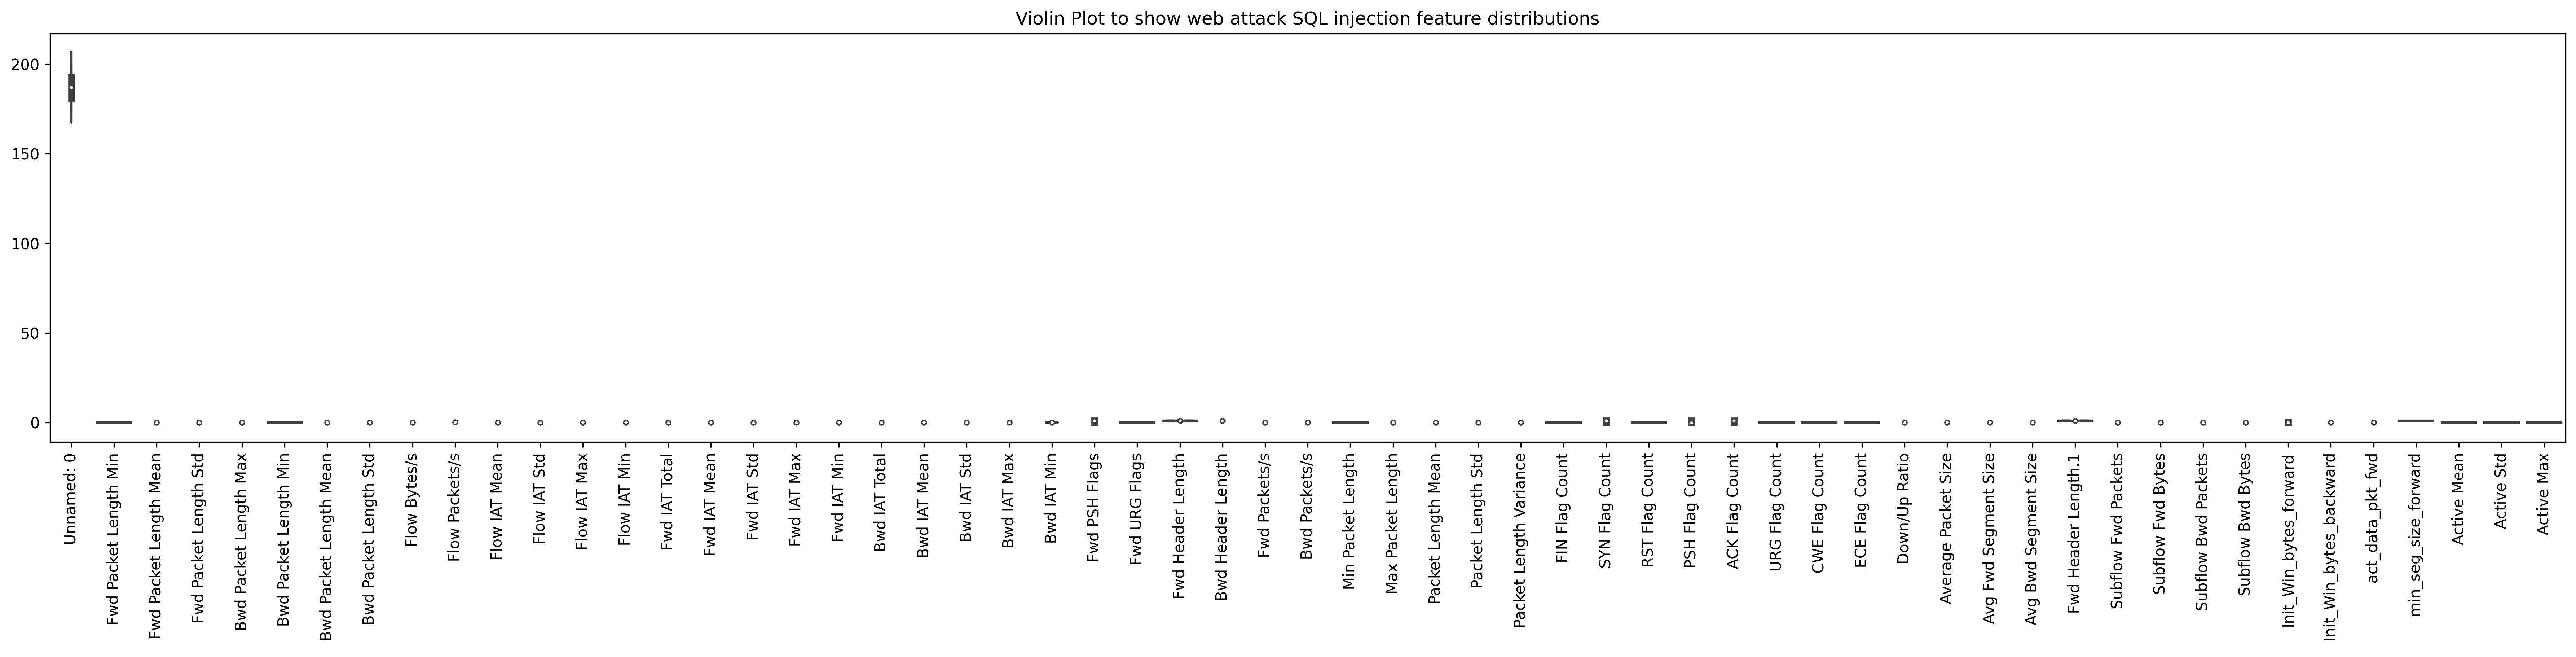

In [ ]:
violinplot(webattacksqlinjection,"web attack SQL injection")
# traffictype=webattacksqlinjection
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(ftppatator,"FTP Patator")
# traffictype= ftppatator
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(sshpatator,"SSH Patator")
# traffictype= sshpatator
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(dosslowloris,"DoS slowloris")
# traffictype= dosslowloris
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(dosslowhttptest,"DoS slow http test")
# traffictype= dosslowhttptest
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(doshulk,"DoS Hulk")
# traffictype= doshulk
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(dosgoldeneye,"DoS GoldenEye")
# traffictype= dosgoldeneye
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

In [ ]:
violinplot(heartbleed,"Heartbleed")
# traffictype= heartbleed
# plt.figure(figsize=(30,5))
# ax = sns.violinplot(data=traffictype)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# title = "Violin Plot to show " + str(traffictype) + "feature distributions"
# ax.set_title(title)
# plt.savefig(traffictype + ".png")

### Findings

Comparing the two charts, we can see that the following features are different across the two classes.

* Flow Duration
* Flow IAT (Mean, Std, Max, Min)
* Fwd IAT (Total, Mean, Std, Max, Min)
* Packet Length Variance
* Idle (Mean, Std, Max, Min)

We now have a clearer view (as far as this dataset is concerned) with what makes for a benign packet, and what makes for a malicious DDoS packet.